In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
#Import the Dataset
data=pd.read_csv('cleaned_market_campaign',sep='\t')
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-04-09,58,...,0,0,0,0,0,0,3,11,1,68
1,1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-08-03,38,...,0,0,0,0,0,0,3,11,0,71
2,2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,3,11,0,60
3,3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-10-02,26,...,0,0,0,0,0,0,3,11,0,41
4,4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,3,11,0,44


### Segment customers by age, income, education

In [14]:
# Create age and income bins
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])
df['Total_Spent']=df['MntFruits']+df['MntWines']+df['MntFishProducts']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']
print(df[['Income_Group','Age_Group','Total_Spent']])

     Income_Group Age_Group  Total_Spent
0        Mid-High       60+         1617
1         Mid-Low       60+           27
2            High     45-60          776
3             Low     30-45           53
4        Mid-High     30-45          422
...           ...       ...          ...
2235     Mid-High     45-60         1341
2236     Mid-High       60+          444
2237     Mid-High     30-45         1241
2238         High       60+          843
2239     Mid-High       60+          172

[2240 rows x 3 columns]


### Visualize spending patterns and campaign response by segment

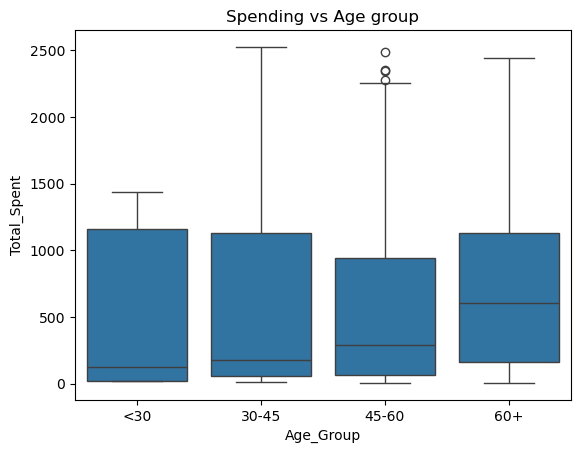

In [20]:
#Spending vs Age group
plt.title("Spending vs Age group")
sns.boxplot(x='Age_Group', y='Total_Spent', data=df)
plt.show()

### Insight
#### For (<30) and (30-45) Age Group-
* (<30) and (30-45) Both the Age Group have similar lower mean spending .It means that these group spend less.
#### For (45-60)-
* The Spend Mean is little higher than the (<30,30-35) Age Group,This Means that This Age group spent more than the Mean.
#### For (60+)-
* The Spend Mean is Highest and This Means They Spend More Constantly.

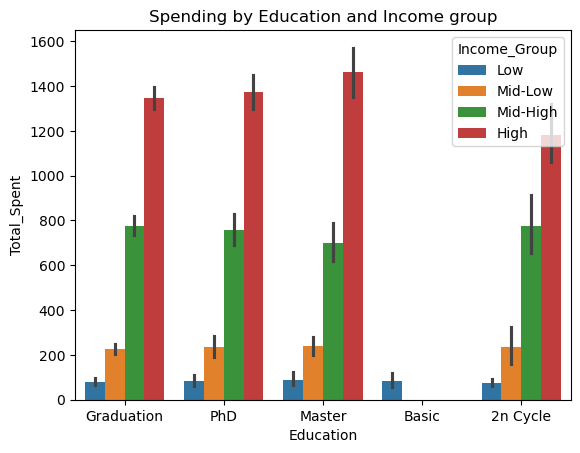

In [22]:
#Spending by Education and Income group
plt.title('Spending by Education and Income group')
sns.barplot(x='Education', y='Total_Spent', hue='Income_Group', data=df)
plt.show()

### Insight:
* High Income Group spends the most across all the education Level.
* Mid High Income Group spends moderate acroll all the education level.
* Low and Mid-Low Groups spends much less than all the education level.
* Education Does Not Matter on spending and Education Level.
  

### Analyze campaign effectiveness (conversion rates by group)

C:\Users\sacha\AppData\Local\Temp\ipykernel_2328\3637898520.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Response'].mean().plot(kind='bar')


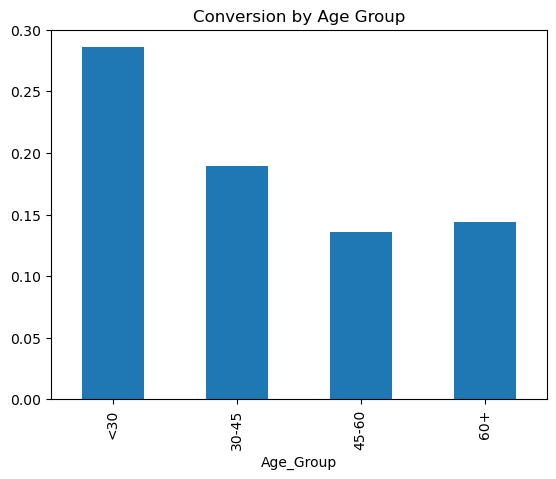

In [30]:
# Overall conversion rate
conversion_rate = df['Response'].mean()

# Conversion by Age Group
plt.title("Conversion by Age Group")
df.groupby('Age_Group')['Response'].mean().plot(kind='bar')
plt.show()

### Insight-
* Age Group(45-60) has very less converation rate.
* Age Group(<30) has the Highest conversion rate.

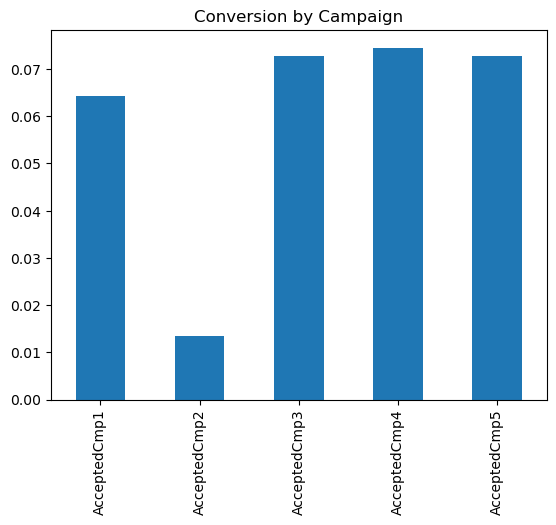

In [34]:
# Conversion by Campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
plt.title('Conversion by Campaign')
df[campaign_cols].mean().plot(kind='bar')
plt.show()

### Insight-
* Campaign Two HAs the Less Conversion Rate.
* Campaign(Three,Four,Five) has the Decent Conversion Rate.

## Calculate correlations between marketing attributes and conversion

<Axes: >

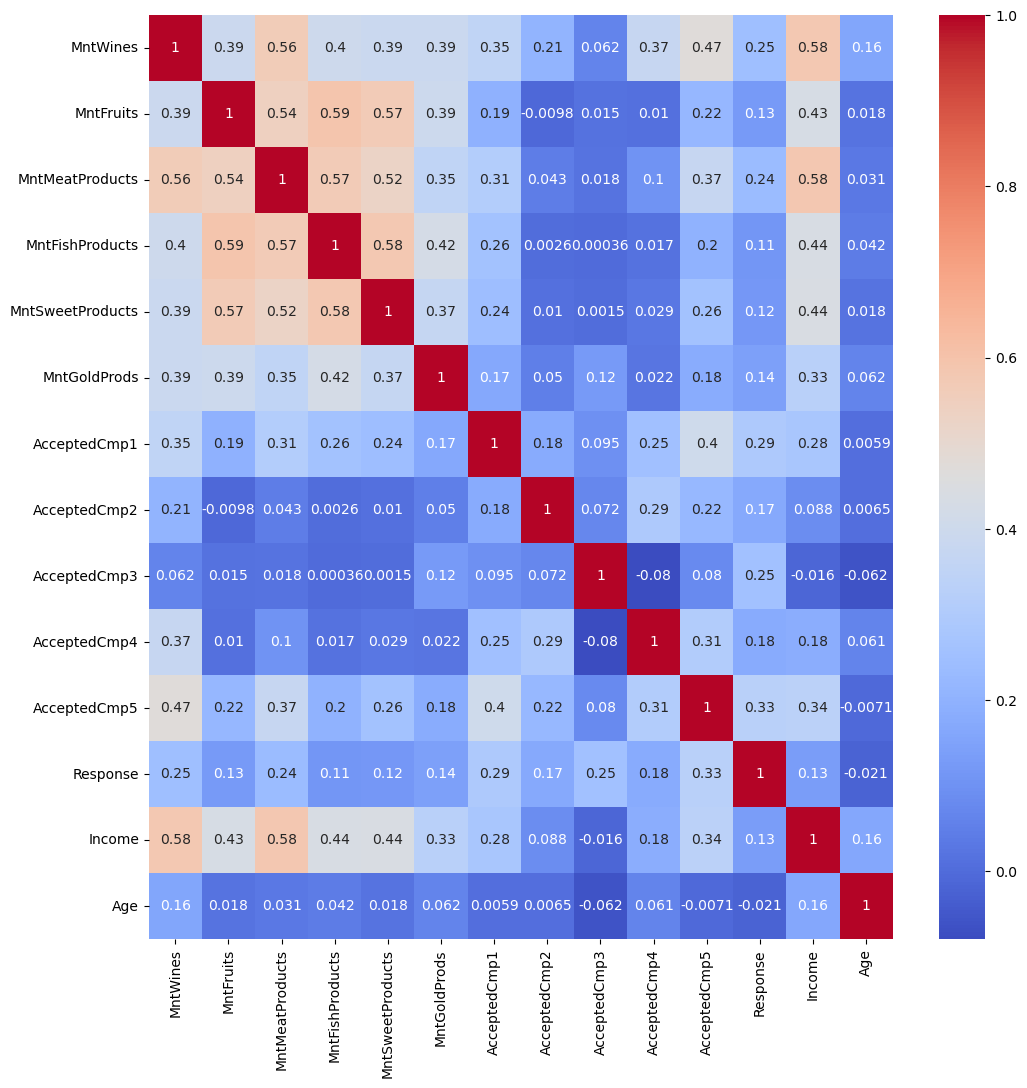

In [38]:
# Full correlation heatmap for marketing attributes
plt.figure(figsize=(12,12))
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
corr_df = df[spending_cols + campaign_cols + ['Income', 'Age']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
